In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
import cv2
import numpy as np
import glob
import os
from random import shuffle

In [2]:
from tensorflow import keras

In [3]:
import tensorflow as tf
print(tf.test.gpu_device_name())

In [4]:
X_train=[]
X_test=[]
Y_test=[]
Y_train=[]
dataTr=[]
for filename in glob.glob(os.path.join('D:/UMSA/TESIS/Tesis de grado/data/entrenamiento/Melanoma_escalado','*.jpg')):
    dataTr.append([1,cv2.imread(filename)])
for filename in glob.glob(os.path.join('D:/UMSA/TESIS/Tesis de grado/data/entrenamiento/Carcinoma_escalado','*.jpg')):
    dataTr.append([0,cv2.imread(filename)])

In [5]:
dataTe=[]
for filename in glob.glob(os.path.join('D:/UMSA/TESIS/Tesis de grado/data/prueba/melanoma_escalado','*.jpg')):
    dataTe.append([1,cv2.imread(filename)])
for filename in glob.glob(os.path.join('D:/UMSA/TESIS/Tesis de grado/data/prueba/carcinoma_escalado','*.jpg')):
    dataTe.append([0,cv2.imread(filename)])

In [6]:
def particion(datos):
    imagenes=[]
    etiquetas=[]
    for i,j in datos:
        imagenes.append(j)
        etiquetas.append(i)
    imagenes=np.array(imagenes)
    etiquetas=np.array(etiquetas)
    return (imagenes,etiquetas)

In [7]:
shuffle(dataTr)
print("en total tenemos: "+str(len(dataTr))+ " imagenes dentro de la carpeta train")
shuffle(dataTe)
print("en total tenemos: "+str(len(dataTe))+ " imagenes dentro de la carpeta test")

en total tenemos: 12279 imagenes dentro de la carpeta train
en total tenemos: 5261 imagenes dentro de la carpeta test


In [8]:
porcion1=dataTr[0:12000]
porcion2=dataTe[0:5000]
print("para entrenamiento tendremos: "+str(len(porcion1))+ " imagenes de la carpeta de train")
print("para prueba tendremos: "+str(len(porcion2))+ " imagenes de la carpeta de test")

para entrenamiento tendremos: 12000 imagenes de la carpeta de train
para prueba tendremos: 5000 imagenes de la carpeta de test


In [9]:
x_e,y_e=particion(porcion1)
x_p,y_p=particion(porcion2)

In [10]:
def validacion(x_e,y_e,x_p,y_p,modelo1,epocas):
    entre=modelo1.fit(x_e,y_e,batch_size=32,epochs=epocas,validation_data=(x_p,y_p))
    a=modelo1.evaluate(x_p,y_p)
    return a[1]

In [11]:
def evaluacion(modelo1,porcentaje,nombre,v1,v2):
    prediccion=0
    epocas=1
    while(True):
        if prediccion < porcentaje:
            prediccion=(validacion(x_e,y_e,x_p,y_p,modelo1,1))*100
            epocas +=1
            v1.append(epocas-1)
            v2.append(prediccion)
        else:
            print("==> Para el metodo "+nombre+" se utilizo: "+str(epocas-1)+" epocas para llegar a mas del "+str(porcentaje)+"% de acertividad")
            break 

In [12]:
modelo=Sequential()
modelo.add(Convolution2D(4,(3,3),input_shape=(224,224,3),activation='relu'))
modelo.add(Convolution2D(8,(3,3),activation='relu'))
modelo.add(MaxPooling2D(pool_size=((2,2))))
modelo.add(Convolution2D(16,(3,3),activation='relu'))
modelo.add(Convolution2D(32,(3,3),activation='relu'))
modelo.add(MaxPooling2D(pool_size=((2,2))))
modelo.add(Flatten())
modelo.add(Dense(128,activation='relu'))
modelo.add(Dense(100,activation='relu'))
modelo.add(Dense(100,activation='relu'))
modelo.add(Dense(1,activation='sigmoid'))
modelo.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 4)       112       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 8)       296       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 16)      1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________

In [13]:
modelo_adam = keras.optimizers.Adam(learning_rate=0.0008)
modelo.compile(optimizer=modelo_adam,loss='binary_crossentropy',metrics=['accuracy'])
v_eA=[]
v_aA=[]
evaluacion(modelo,80,"ADAM",v_eA,v_aA)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 9s 2ms/sample - loss: 0.4707 - acc: 0.7738
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 9s 2ms/sample - loss: 0.3983 - acc: 0.8264
==> Para el metodo ADAM se utilizo: 2 epocas para llegar a mas del 80.6% de acertividad


In [14]:
evaluacion(modelo,85,"ADAM",v_eA,v_aA)

Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 9s 2ms/sample - loss: 0.4874 - acc: 0.8470
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 9s 2ms/sample - loss: 0.4536 - acc: 0.8374
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 9s 2ms/sample - loss: 0.5214 - acc: 0.8558
==> Para el metodo ADAM se utilizo: 3 epocas para llegar a mas del 85% de acertividad


In [ ]:
evaluacion(modelo,90,"ADAM",v_eA,v_aA)

Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 9s 2ms/sample - loss: 0.5626 - acc: 0.8542
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 9s 2ms/sample - loss: 0.5465 - acc: 0.8502
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 9s 2ms/sample - loss: 0.6405 - acc: 0.8556
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 9s 2ms/sample - loss: 0.6455 - acc: 0.8618
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 9s 2ms/sample - loss: 0.5690 - acc: 0.8682
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 9s 2ms/sample - loss: 0.7348 - acc: 0.8634
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 9s 2ms/sample - loss: 0.6329 - acc: 0.8592
Train on 12000 samples, validate on 5000 

5000/5000 [==============================] - 10s 2ms/sample - loss: 1.0505 - acc: 0.8788
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 9s 2ms/sample - loss: 1.0818 - acc: 0.8800
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 9s 2ms/sample - loss: 1.1335 - acc: 0.8800
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 9s 2ms/sample - loss: 1.1765 - acc: 0.8794
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 9s 2ms/sample - loss: 1.2145 - acc: 0.8804
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 9s 2ms/sample - loss: 1.2462 - acc: 0.8796
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 9s 2ms/sample - loss: 1.2766 - acc: 0.8804
Train on 12000 samples, validate on 5000 samples
5000/5000 [=============================

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\tesis\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_900\2153091155.py", line 1, in <module>
    evaluacion(modelo,90,"ADAM",v_eA,v_aA)
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_900\1593769438.py", line 6, in evaluacion
    prediccion=(validacion(x_e,y_e,x_p,y_p,modelo1,1))*100
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_900\2085629365.py", line 2, in validacion
    entre=modelo1.fit(x_e,y_e,batch_size=32,epochs=epocas,validation_data=(x_p,y_p))
  File "C:\Users\Desktop\.conda\envs\tesis\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 727, in fit
    use_multiprocessing=use_multiprocessing)
  File "C:\Users\Desktop\.conda\envs\tesis\lib\site-packages\tensorflow_core\python\keras\engine\training_arrays.py", line 675, in fit
    steps_n

In [16]:
modelo.save("D:/UMSA/Documentos/CNN cancer de piel/MODELOS/17000_4_3_FINAL/modelo")

In [17]:
modelo.save_weights("D:/UMSA/Documentos/CNN cancer de piel/PESOS/17000_4_3_FINAL/modelo_pesos")

In [18]:
count=1
print("# de EPOCAS     Valor del Accuracy")
print("----------------------------------")
for i in v_aA:
    print("epoca ",count," => ",i)
    count +=1

# de EPOCAS     Valor del Accuracy
----------------------------------
epoca  1  =>  77.38000154495239
epoca  2  =>  82.63999819755554
epoca  3  =>  84.7000002861023
epoca  4  =>  83.74000191688538
epoca  5  =>  85.57999730110168
epoca  6  =>  85.4200005531311
epoca  7  =>  85.01999974250793
epoca  8  =>  85.55999994277954
epoca  9  =>  86.18000149726868
epoca  10  =>  86.82000041007996
epoca  11  =>  86.33999824523926
epoca  12  =>  85.92000007629395
epoca  13  =>  85.6000006198883
epoca  14  =>  85.29999852180481
epoca  15  =>  85.5400025844574
epoca  16  =>  86.69999837875366
epoca  17  =>  84.79999899864197
epoca  18  =>  86.14000082015991
epoca  19  =>  86.54000163078308
epoca  20  =>  84.43999886512756
epoca  21  =>  84.7000002861023
epoca  22  =>  87.48000264167786
epoca  23  =>  82.16000199317932
epoca  24  =>  87.99999952316284
epoca  25  =>  84.52000021934509
epoca  26  =>  87.30000257492065
epoca  27  =>  84.96000170707703
epoca  28  =>  87.40000128746033
epoca  29  =>  85.72

In [19]:
%matplotlib inline
import matplotlib.pyplot as mp

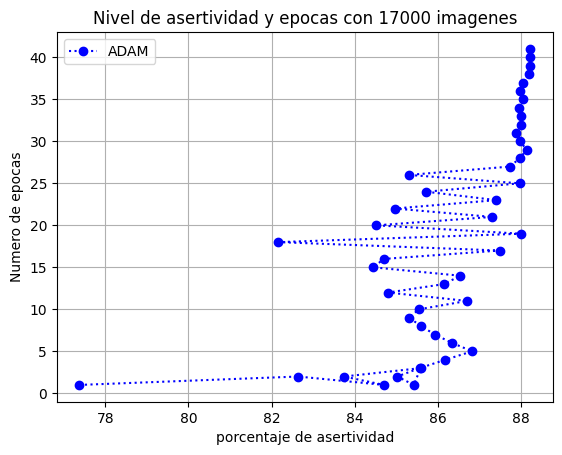

In [20]:
mp.plot(v_aA,v_eA, marker='o', linestyle=':', color='b', label = "ADAM")

#mp.xticks(np.arange(70,100,2))
#mp.yticks(np.arange(0,4,1))
mp.xlabel("porcentaje de asertividad")
mp.ylabel("Numero de epocas")
mp.legend(loc="upper left")
mp.title("Nivel de asertividad y epocas con 17000 imagenes")
mp.grid(True)
mp.show()

In [21]:
lr_probs = modelo.predict_proba(x_p)
lr_probs = lr_probs[:, 0]
ns_probs = [0 for _ in range(len(y_p))]


In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [23]:
# Calculamos el AUC
ns_auc = roc_auc_score(y_p, ns_probs)
lr_auc = roc_auc_score(y_p, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Red Neuronal: ROC AUC=%.3f' % (lr_auc))

Sin entrenar: ROC AUC=0.500
Red Neuronal: ROC AUC=0.939


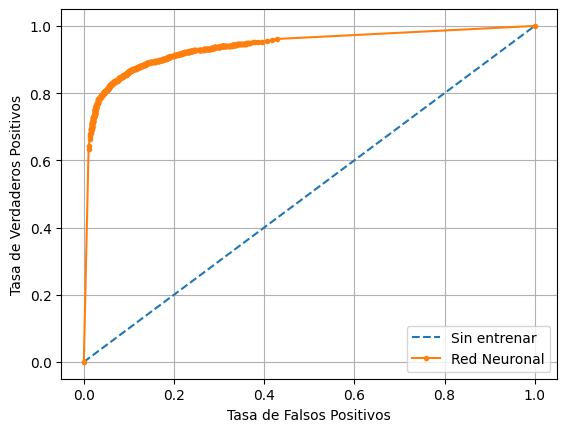

In [24]:
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_p, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_p, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Red Neuronal')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
mp.grid(True)
pyplot.show()

In [25]:
lr_probs = modelo.predict_proba(x_p)
# Nos quedamos unicamente con las predicciones positicas
lr_probs = lr_probs[:, 0]

In [26]:
yhat = modelo.predict(x_p)

In [27]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [28]:
lr_precision, lr_recall, _ = precision_recall_curve(y_p, lr_probs)
lr_auc =  auc(lr_recall, lr_precision)
no_skill = len(y_p[y_p==1]) / len(y_p)


Redes neuronales: auc=0.950


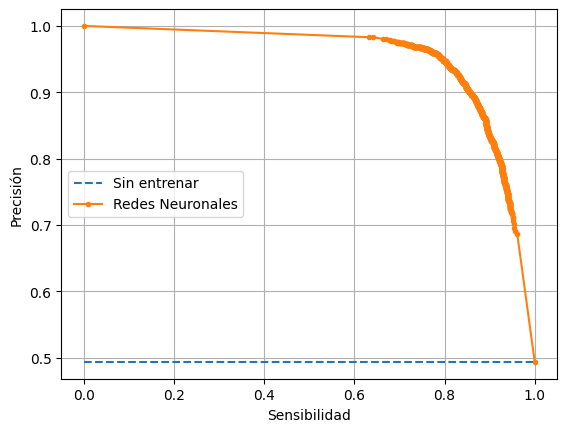

In [29]:
print('Redes neuronales: auc=%.3f' % (lr_auc))
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Redes Neuronales')
#Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()
mp.grid(True)
pyplot.show()

In [30]:
modelo.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 4) dtype=float32>,
 <tf.Variable 'conv2d/bias:0' shape=(4,) dtype=float32>,
 <tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 4, 8) dtype=float32>,
 <tf.Variable 'conv2d_1/bias:0' shape=(8,) dtype=float32>,
 <tf.Variable 'conv2d_2/kernel:0' shape=(3, 3, 8, 16) dtype=float32>,
 <tf.Variable 'conv2d_2/bias:0' shape=(16,) dtype=float32>,
 <tf.Variable 'conv2d_3/kernel:0' shape=(3, 3, 16, 32) dtype=float32>,
 <tf.Variable 'conv2d_3/bias:0' shape=(32,) dtype=float32>,
 <tf.Variable 'dense/kernel:0' shape=(89888, 128) dtype=float32>,
 <tf.Variable 'dense/bias:0' shape=(128,) dtype=float32>,
 <tf.Variable 'dense_1/kernel:0' shape=(128, 100) dtype=float32>,
 <tf.Variable 'dense_1/bias:0' shape=(100,) dtype=float32>,
 <tf.Variable 'dense_2/kernel:0' shape=(100, 100) dtype=float32>,
 <tf.Variable 'dense_2/bias:0' shape=(100,) dtype=float32>,
 <tf.Variable 'dense_3/kernel:0' shape=(100, 1) dtype=float32>,
 <tf.Variable 'dense_3/bias:0' shape=(1,) dtype